<br><br><br><br><br>

# Numpy (and Pandas) skills

<br><br><br><br><br>

<br><br><br><br><br><br>

<b>Why use Python for data analysis?</b>

<br><br><br><br><br><br>

<img src="img/pypl-2019.png" width="100%">

<br><br><br>

<img src="img/python-r-cpp-googletrends-machinelearning.png" width="100%">

<br><br><br>

<br>

<img src="img/root-spark-pandas-google-trends.png" width="100%">

<br>

<center><img src="img/mentions-of-programming-languages.png" width="70%"></center>

<center><img src="img/ligo-notebook.png" width="60%"></center>

<img src="img/shells-1.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-2.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-3.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-4.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-5.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

### The key to ecosystem development was a common array library

| Date | Development |
|:----:|:-----|
| 1994 | **Python** 1.0 released. |
| 1995 | **Numeric** was the first array package (a.k.a. Numerical, Numerical Python, Numpy). |
| 2001 | **SciPy** gathered scientific functions into one codebase. |
| 2003 | **Matplotlib** released (though it was one among many plotters... R.I.P. **Biggles**). |
| 2003 | **Numarray** introduced as a competitor to **Numeric** with more features (memory-mapped files, alignment, record arrays). |
| <br> | _Scientific Python community split over building their applications on **Numeric** or **Numarray**!_ |
| 2005 | **Numpy**, a new library, unified features of **Numeric** and **Numarray**, became the common array library. |

### The key to ecosystem development was a common array library

| Date | Development |
|:----:|:-----|
| 1994 | **Python** 1.0 released. |
| 1995 | **Numeric** was the first array package (a.k.a. Numerical, Numerical Python, Numpy). |
| 2001 | **SciPy** gathered scientific functions into one codebase. |
| 2003 | **Matplotlib** released (though it was one among many plotters... R.I.P. **Biggles**). |
| 2003 | **Numarray** introduced as a competitor to **Numeric** with more features (memory-mapped files, alignment, record arrays). |
| <br> | _Scientific Python community split over building their applications on **Numeric** or **Numarray**!_ |
| 2005 | **Numpy**, a new library, unified features of **Numeric** and **Numarray**, became the common array library. |
| 2008 | **Pandas** first released. |
| 2010 | **Scikit-Learn** first released. |
| 2011 | **AstroPy** first released. |
| 2012 | **Anaconda** first released. |
| 2014 | **Jupyter** first released. |
| 2015 | **Keras** first released. |

In [23]:
# Numpy provides speed and conciseness over pure Python.

import numpy

BIG = 1000000
pt = abs(numpy.random.normal(100, 10, BIG))
eta = numpy.random.normal(0, 2, BIG)

# Pythonic:
pz1 = numpy.empty(len(pt))
for i in range(len(pt)):
    pz1[i] = pt[i] * numpy.sinh(eta[i])

# Numpythonic:
pz2 = pt * numpy.sinh(eta)

print(pz1)
print(pz2)

[-2.60178343e+02  1.36013250e+00  1.56623327e+03 ...  3.96612118e+01
 -5.02910769e+02  1.74078165e+02]
[-2.60178343e+02  1.36013250e+00  1.56623327e+03 ...  3.96612118e+01
 -5.02910769e+02  1.74078165e+02]


In [25]:
%%timeit

# Pythonic:
pz1 = numpy.empty(len(pt))
for i in range(len(pt)):
    pz1[i] = pt[i] * numpy.sinh(eta[i])

2.22 s ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%%timeit

# Numpythonic:
pz2 = pt * numpy.sinh(eta)

22.6 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Numpy is for simple operations on many elements

<br>

| Pythonic | Numpythonic |
|:----|:----|
| **_O(n)_** Python bytecode instructions | **_O(1)_** Python bytecode instructions |
| **_O(n)_** type-checks | **_O(1)_** type-checks |
| **_O(n)_** interpreter locks | **_O(1)_** interpreter locks |
| <br> | **_O(n)_** statically typed, native bytecode operations |

<br>

In other words, Numpy performs a <b>S</b>ingle (Python) <b>I</b>nstruction on <b>M</b>ultiple <b>D</b>ata.

(Conceptually similar to SIMD, the program flow of GPUs.)

<br><br>

Do all your dataset organization and bookkeeping in high-level Python and your fast math in compiled code.

In [43]:
# Physics data!

import uproot
arrays = (uproot.open("http://scikit-hep.org/uproot/examples/Zmumu.root")["events"]
                .arrays("*", namedecode="utf-8"))

print("\n\nNames of arrays in this dict:")
print(list(arrays))

for n in arrays:
    exec(f"{n} = arrays['{n}']")

print("\n\nExample array:\n", E1)



Names of arrays in this dict:
['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M']


Example array:
 [82.20186639 62.34492895 62.34492895 ... 81.27013558 81.27013558
 81.56621735]


In [45]:
# For f(A[i], B[i]) → C[i] operations, the scalar code is identical to the array code.

# Does this function take numbers or arrays of numbers?
def compute_mass(E1, E2, px1, px2, py1, py2, pz1, pz2):
    return numpy.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)

# Pass a number for each argument:
print("\n\nSingle mass:", compute_mass(E1[0], E2[0], px1[0], px2[0], py1[0], py2[0], pz1[0], pz2[0]))

# Pass an array for each argument:
print("\n\nAll masses:\n", compute_mass(E1, E2, px1, px2, py1, py2, pz1, pz2))



Single mass: 82.46269155513643


All masses:
 [82.46269156 83.62620401 83.30846467 ... 95.96547966 96.49594382
 96.65672765]


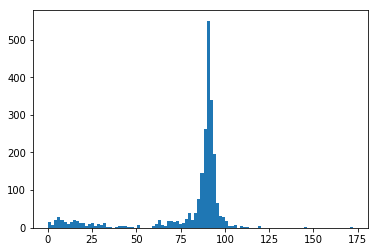

In [54]:
masses = compute_mass(E1, E2, px1, px2, py1, py2, pz1, pz2)

import matplotlib.pyplot
matplotlib.pyplot.hist(masses, bins=100);

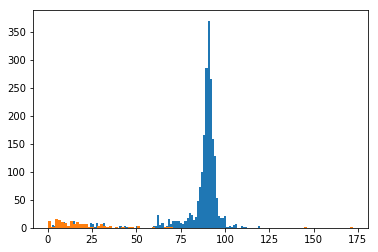

In [58]:
# Most of the time, you do a single operation on all data, plot the result, then do the next operation.

good_masses = masses[Q1 != Q2]
matplotlib.pyplot.hist(good_masses, bins=100);

bad_masses = masses[Q1 == Q2]
matplotlib.pyplot.hist(bad_masses, bins=100);

<br>

This style of programming is found _primarily_ in data analysis languages, pioneered by APL.

<br>

<center><img src="img/apl-timeline.png" width="80%"></center>

### APL discovered the mistake of being too concise

<img src="img/tshirt.jpg" width="20%" align="right">

Conway's Game of Life is one line of APL code:

```
life ← {↑1　⍵∨.∧3　4=+/,¯1　0　1∘.⊖¯1　0　1∘.⌽⊂⍵}
```

"Map" is implicit, "reduce" is a slash, functions are symbols.

<center><img src="img/apl-keyboard.jpg" width="40%"></center>

<br><br><br>

### Numpy (generations later) strikes a balance: the right amount of conciseness

| APL | <br> | Numpy |
|:---:|:----:|:-----:|
| <tt>ι4</tt> | <br> | <tt>numpy.arange(4)</tt> |
| <tt>(3+ι4)</tt> | <br> | <tt>numpy.arange(4) + 3</tt> |
| <tt>+/(3+ι4)</tt> | <br> | <tt>(numpy.arange(4) + 3).sum()</tt> |
| <tt>m ← +/(3+ι4)</tt> | <br> | <tt>m = (numpy.arange(4) + 3).sum()</tt> |

<br><br><br>

In [60]:
# APL game of life:
# life ← {↑1　⍵∨.∧3　4=+/,¯1　0　1∘.⊖¯1　0　1∘.⌽⊂⍵}

# Numpy game of life:
world = (numpy.random.uniform(0, 1, (20, 100)) < 0.3)                   # fill 30% of 20×100 grid

def step(world):
    "Step the world forward."
    neighbors = numpy.zeros(world.shape, dtype=int)                     # initialize neighors count
    for dir1 in -1, 0, 1:
        for dir2 in -1, 0, 1:
            if not (dir1 == 0 and dir2 == 0):                           # add each rolled direction
                neighbors += numpy.roll(numpy.roll(world, dir1, axis=0), dir2, axis=1)

    survivors = ((world == 1) & (neighbors > 1) & (neighbors < 4))      # old cells that survive
    births    = ((world == 0) & (neighbors == 3))                       # new cells that are born

    return (births | survivors).astype(world.dtype)                     # union as booleans

def show(world):
    "Print the world."
    print("\n".join("|" + "".join("*" if y else " " for y in x) + "|" for x in world))

In [146]:
world = step(world)
show(world)

|  *           ** ***          * *       ***                                         **     ***      |
| *            **  * *          *        *    *                                       **    ** *     |
| ***           *           *            *  **             *                  *        ****          |
|  **            *         * *            *               **                  *          *           |
|                                                        ** *                 *          *     *     |
|                         *   *   **             *                                           *  *    |
|                                 **             *        * *             ***                * **    |
|       *             **   * *                             **    **                         *  **    |
|     **              **    *             **     *       * **     *                                  |
|     ****   **                                  *        **   * *       